# Import pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
hdata=pd.read_csv('data_sets/home_data.csv')
hdata.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Exploring the data for the housing sale

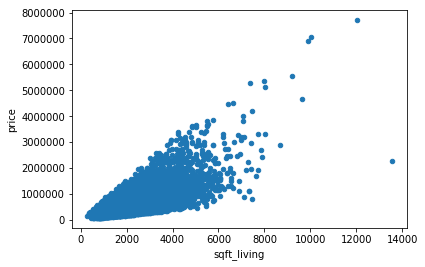

In [3]:
hdata.plot(x='sqft_living',y='price',kind='scatter')
plt.show()

# Create a simple regression model for sqft_living to price

In [4]:
from sklearn.cross_validation import train_test_split
X=np.array(hdata['sqft_living']).reshape(-1,1)
Y=np.array(hdata['price'])
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=0)

/Users/shri/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Creating a model

In [5]:
from sklearn.linear_model import LinearRegression
sqft_model=LinearRegression()
sqft_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluating the model

In [6]:
x_test=x_test.reshape(-1,1)
y_pred=sqft_model.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)               #calculating mean squared error

70170012488.97433

## Let's show how our prediction looks like

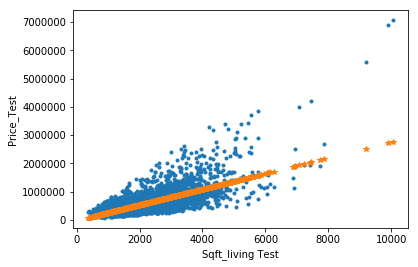

In [9]:
plt.xlabel('Sqft_living Test')
plt.ylabel('Price_Test')
plt.plot(x_test,y_test,'.',
        x_test,y_pred,'*')
plt.show()

## Obtaining the weights 

In [17]:
sqft_model.coef_, sqft_model.intercept_

(array([278.32860745]), -37893.59946445632)

## Exploring other features

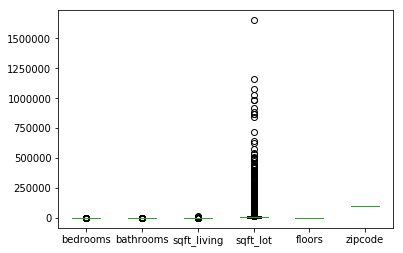

In [18]:
my_features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
hdata[my_features].plot(kind='box')

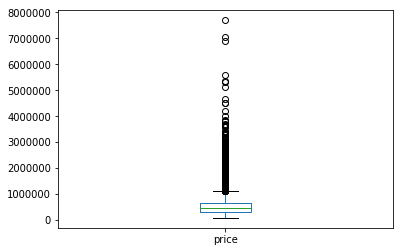

In [19]:
hdata.plot(x='zipcode',y='price',kind='box')

# Build a regression model with more features

In [20]:
my_features_model=LinearRegression()
X_features = np.array(hdata[my_features])
X_features.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(X_features,Y,test_size=0.3,train_size=0.7,random_state=0)

In [21]:
my_features_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evaluating the model and comparing

In [24]:
y_pred2=my_features_model.predict(x_test)
rmse_mf=math.sqrt(mean_squared_error(y_test,y_pred2))
print("Rmse for my_feature model : %f"%rmse_mf)

Rmse for my_feature model : 259051.671434


# Apply learned models to predict prices of 3 houses

In [25]:
house1=hdata[hdata['id']==5309101200]

In [26]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [27]:
house1['price']

1054    620000
Name: price, dtype: int64

In [28]:
house1sq=np.array(house1['sqft_living'])
house1sq=house1sq.reshape(-1,1)
sqft_model.predict(house1sq)

array([630095.05840516])

In [29]:
house1mf=np.array(house1[my_features])
#house1mf=house1mf.reshape(-1,1)
#house1mf.shape,house1sq,x_test.shape
my_features_model.predict(house1mf)

array([636449.39377442])

## Prediction for a second house

In [30]:
house2=hdata[hdata['id']==1925069082]

In [31]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [32]:
house2sq=np.array(house2['sqft_living'])
house2sq=house2sq.reshape(-1,1)
sqft_model.predict(house2sq)

array([1253551.13908347])

In [33]:
house2mf=np.array(house2[my_features])
my_features_model.predict(house2mf)

array([1257667.43509285])

## Predicting even fancier house

In [34]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [35]:
house3sq=np.array(bill_gates['sqft_living'])
house3sq=house3sq.reshape(-1,1)
sqft_model.predict(house3sq)

array([13878536.77281922])

In [36]:
house3=[]
for f in my_features:
    house3.extend(bill_gates[f])
house3mf=np.array(house3)
house3mf=house3mf.reshape((1,6))          #for making the dimension same
house3mf=np.array(house3mf,dtype='float')
#house3mf=np.array(bill_gates[my_features])
print(my_features_model.predict(house3mf))

[15422736.69718318]


# Completing the Assignment using more advance features

In [40]:
advanced_features= ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode','condition',
                   'grade',
                   'waterfront',
                   'view',
                   'sqft_above',
                   'sqft_basement',
                   'yr_built',
                   'yr_renovated',
                   'lat',
                   'long',
                   'sqft_living15',
                   'sqft_lot15']
X_adv=np.array(hdata[advanced_features])
x_train,x_test,y_train,y_test=train_test_split(X_adv,Y,train_size=0.7,test_size=0.3,random_state=0)

In [41]:
adv_model=LinearRegression()
adv_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
yadv_pred=adv_model.predict(x_test)
mse=mean_squared_error(y_test,yadv_pred)
mse

42863879326.1766

In [43]:

rmse_adv=math.sqrt(mse)
rmse_adv

207035.93728185596

## Difference between the RMSE's

In [46]:
rmse_mf,rmse_adv

(259051.67143361544, 207035.93728185596)

In [47]:
print("Difference between the RMSE'S  : %f"%(rmse_mf-rmse_adv))

Difference between the RMSE'S  : 52015.734152


In [53]:
samples=hdata[(hdata['sqft_living']>=2000) & (hdata['sqft_living']<=4000)].shape[0]/hdata.shape[0]
samples

0.4266413732475825

## Selection and summary statistics

In [232]:
zips=hdata['zipcode'].unique()
max_avg=[]
for a in zips:
    total=0
    i=0
    houses=hdata[hdata['zipcode']==a]
    houses=houses['price']
    for house in houses:
         total=total+house
         i+=1
    total=total/i
    max_avg.append(total)
max(max_avg)

2160606.6